# Accidentabilidad de VMPs en Barcelona e incidencia sobre peatones
## *Según datos de la Guàrdia Urbana del año 2022*  

## Parte II. Análisis exploratorio

El Ayuntamiento de París ha decidido __[dar por finalizada la concesión de uso del espacio público a los operadores de VMPs compartidos a partir del 1 de septiembre de 2023](https://www.paris.fr/pages/pour-ou-contre-les-trottinettes-en-libre-service-23231)__, una decisión tomada tras una consulta popular celebrada en abril en la que __[cerca del 90% de los participantes votó a favor](https://www.xataka.com/movilidad/parisinos-se-han-hartado-patinetes-electricos-que-han-expulsado-referendum)__ de esta medida. Sorprendido por esta noticia he querido comprobar la situación en la ciudad de Barcelona. Será un **análisis exploratorio** sencillo en el que comprobaré la accidentabilidad de VMPs (sin distinguir entre eléctricos y no eléctricos) y la incidencia de estos accidentes en los peatones. Para ello usaré los datos de la Guàrdia Urbana del año 2022 publicados en el portal de __[Open Data del Ajuntament de Barcelona](https://opendata-ajuntament.barcelona.cat/es)__.

El objetivo de este proyecto es obtener una imagen superficial que permita dar una idea de esta situación en Barcelona. De entrada se va a comprobar cuántos de los accidentes reportados el año 2022 tienen, al menos, un VMP implicado y, de todos estos, en cuántos se ha causado lesiones a un peatón. Se va a comprobar a qué horas se producen estos accidentes en función del día de la semana, y se va a comprobar también la incidencia por barrio. Finalmente se va a visualizar en un mapa los accidentes con VMPs implicados en la ciudad, distinguiendo aquellos en que hay por lo menos un peatón lesionado y la responsabilidad o no del peatón en la colisión.

En esta segunda parte se lleva a cabo el análisis de accidentabilidad de VMPs en la ciudad de Barcelona el año 2022. En cuanto a la representación gráfica de los resultados se ha decidido utilizar la herramienta flourish, por tanto se van a adecuar los resultados para crear los ficheros csv necesarios para exportar la información necesaria y permitir su uso en esta herramienta.

In [1]:
# Carga de las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lectura del fichero acondicionado en el script anterior

accs_df = pd.read_csv("clean_data/accs_whole_info.csv")

print(accs_df.head())
display(accs_df.dtypes)

  Numero_expedient  Codi_districte  Codi_barri             Dia_Hora  \
0  2022S007749                  -1          -1  2022-12-19 11:00:00   
1  2022S003422                  -1          -1  2022-06-04 14:00:00   
2  2022S003346                  -1          -1  2022-06-01 21:00:00   
3  2022S006073                  -1          -1  2022-10-08 21:00:00   
4  2022S005123                  -1          -1  2022-08-26 16:00:00   

     Latitud  Longitud  TipusVeh_Bicicleta  TipusVeh_Otros_veh  TipusVeh_VMP  \
0  41.439261  2.193098                   0                   2             0   
1  41.404080  2.208515                   0                   2             0   
2  41.443596  2.176568                   0                   1             1   
3  41.332974  2.138671                   0                   1             0   
4  41.385209  2.173975                   0                   0             1   

   Pers_Conductor  Pers_Passatger  Pers_Vianant Es_causa_peaton  \
0               1        

Numero_expedient       object
Codi_districte          int64
Codi_barri              int64
Dia_Hora               object
Latitud               float64
Longitud              float64
TipusVeh_Bicicleta      int64
TipusVeh_Otros_veh      int64
TipusVeh_VMP            int64
Pers_Conductor          int64
Pers_Passatger          int64
Pers_Vianant            int64
Es_causa_peaton        object
Ubicacion_peaton       object
dtype: object

In [3]:
# Conversion del campo "Dia_Hora" de Object a Datetime
accs_df["Dia_Hora"] = pd.to_datetime(accs_df["Dia_Hora"])

display(accs_df.dtypes)

Numero_expedient              object
Codi_districte                 int64
Codi_barri                     int64
Dia_Hora              datetime64[ns]
Latitud                      float64
Longitud                     float64
TipusVeh_Bicicleta             int64
TipusVeh_Otros_veh             int64
TipusVeh_VMP                   int64
Pers_Conductor                 int64
Pers_Passatger                 int64
Pers_Vianant                   int64
Es_causa_peaton               object
Ubicacion_peaton              object
dtype: object

In [4]:
print("Se han reportado " + str(len(accs_df)) + ' accidentes, de los cuales ' + 
      str(len(accs_df[accs_df['TipusVeh_VMP'] > 0])) + 
      ' con VMPs implicados.')

Se han reportado 7999 accidentes, de los cuales 859 con VMPs implicados.


In [5]:
accs_vmp_locdf = accs_df.loc[accs_df['TipusVeh_VMP'] > 0,:]

print(accs_vmp_locdf.shape)

print(accs_vmp_locdf.head())

(859, 14)
   Numero_expedient  Codi_districte  Codi_barri            Dia_Hora  \
2   2022S003346                  -1          -1 2022-06-01 21:00:00   
4   2022S005123                  -1          -1 2022-08-26 16:00:00   
26  2022S001073                  10          64 2022-02-22 12:00:00   
34  2022S006468                  10          64 2022-10-26 19:00:00   
40  2022S002454                  10          72 2022-04-26 17:00:00   

      Latitud  Longitud  TipusVeh_Bicicleta  TipusVeh_Otros_veh  TipusVeh_VMP  \
2   41.443596  2.176568                   0                   1             1   
4   41.385209  2.173975                   0                   0             1   
26  41.409435  2.181215                   0                   1             1   
34  41.409833  2.185956                   0                   1             1   
40  41.413834  2.195381                   0                   0             1   

    Pers_Conductor  Pers_Passatger  Pers_Vianant Es_causa_peaton  \
2       

## 1. Números en crudo, imagen global

In [6]:
print("Se han reportado " + str(len(accs_vmp_locdf)) +
      ' accidentes con VMPs implicados, de los cuales ' + 
      str(len(accs_vmp_locdf[accs_vmp_locdf['Pers_Vianant'] > 0])) + 
      ' con peatones lesionados.')

Se han reportado 859 accidentes con VMPs implicados, de los cuales 170 con peatones lesionados.


In [7]:
accs_vian_df = accs_df[accs_df['Pers_Vianant'] > 0]

print(accs_vian_df.shape)

print(accs_vian_df.head())

(948, 14)
   Numero_expedient  Codi_districte  Codi_barri            Dia_Hora  \
5   2022S003977                  -1          -1 2022-06-30 11:00:00   
20  2022S007370                  10          64 2022-12-01 06:00:00   
35  2022S007415                  10          64 2022-12-02 12:00:00   
39  2022S004131                  10          72 2022-07-07 09:00:00   
40  2022S002454                  10          72 2022-04-26 17:00:00   

      Latitud  Longitud  TipusVeh_Bicicleta  TipusVeh_Otros_veh  TipusVeh_VMP  \
5   41.413696  2.193542                   0                   1             0   
20  41.415343  2.180430                   0                   1             0   
35  41.410212  2.184566                   0                   1             0   
39  41.413876  2.195592                   0                   1             0   
40  41.413834  2.195381                   0                   0             1   

    Pers_Conductor  Pers_Passatger  Pers_Vianant Es_causa_peaton  \
5       

In [8]:
print("Se han reportado " + str(len(accs_vian_df)) +
      ' accidentes con peatones lesionados, de los cuales ' + 
      str(len(accs_vian_df[accs_vian_df['TipusVeh_VMP'] > 0])) + 
      ' con VMPs implicados.')

Se han reportado 948 accidentes con peatones lesionados, de los cuales 170 con VMPs implicados.


In [9]:
print("Se han reportado " + str(len(accs_vmp_locdf)) +
      ' accidentes con VMPs implicados, de los cuales ' + 
      str(len(accs_vmp_locdf[(accs_vmp_locdf['Pers_Vianant'] > 0) & (accs_vmp_locdf['Ubicacion_peaton'] == 'Zona Peatonal')])) + 
      ' con peatones lesionados en zona peatonal.')

Se han reportado 859 accidentes con VMPs implicados, de los cuales 68 con peatones lesionados en zona peatonal.


In [10]:
print("Se han reportado " + str(len(accs_vmp_locdf)) +
      ' accidentes con VMPs implicados, de los cuales ' + 
      str(len(accs_vmp_locdf[(accs_vmp_locdf['Pers_Vianant'] > 0) & (accs_vmp_locdf['Es_causa_peaton'] == 'No')])) + 
      ' con peatones lesionados que no son responsables del accidente.')

Se han reportado 859 accidentes con VMPs implicados, de los cuales 109 con peatones lesionados que no son responsables del accidente.


### 1.1 Comentarios sobre la imagen global 

A partir de los resultados obtenidos en la imagen numérica global presentada en este apartado, se observa que:

- Un 10.74% de los accidentes reportados tienen, por lo menos, un VMP implicado. A priori, es una cifra alta, convendría conocer el porcentaje de VMPs en el total vehículos que circulan en la ciudad, pero de entrada intuyo que es muy inferior al 10%.
- Prácticamente uno de cada cinco accidentes con al menos un VMP implicado ha resultado con al menos un peatón lesionado. De nuevo una cifra que se puede considerar alta, teniendo en cuenta que por normativa la circulación de VMPs en zonas peatonales está muy restringida, lo que debería reducir las zonas de convivencia entre ambos.
- Un 17,93% de los accidentes reportados con peatones lesionados tienen, por lo menos, un VMP implicado. Mismo razonamiento que los dos puntos anteriores.
- De los 170 accidentes de VMPS reportados con al menos un peatón lesionado, el 40% (68 en total) han ocurrido en zonas peatonales, mientras que el 64% (109 en total) no son atribuibles al peatón. Las cifras son explícitas y dan cuenta de la peligrosidad de los VMPs para los peatones.

La imagen global obtenida para el año 2022 en la ciudad de Barcelona demuestran el alto nivel de accidentabilidad de los vehículos VMPs y de su alto impacto en la seguridad viaria de los peatones.

## 2. Análisis de la accidentabilidad de VMPs

Para el análisis solo se tendrá en cuenta el subconjunto de los accidentes reportados con al menos un VMP implicado: *accs_vmp_df*

De entrada se ejecutará un paso previo necesario para exportar los datos para las visualizaciones en la herramienta flourish: cargar los datos de distritos y barrios de los ficheros auxiliares para poder asignar nombres a las etiquetas en la visualización, más descriptivas que los códigos.

In [11]:
# Lectura de los ficheros con los nombres de los distritos y de los barrios de BCN

bcn_dtos_df = pd.read_csv("clean_data/bcn_districtes.csv")
bcn_brs_df = pd.read_csv("clean_data/bcn_barris.csv")

print(bcn_dtos_df.head())
print(bcn_brs_df.head())

   Codi_districte   Nom_districte
0              -1      Desconegut
1               1    Ciutat Vella
2               2        Eixample
3               3  Sants-Montjuïc
4               4       Les Corts
   Codi_districte  Codi_barri Nom_districte  \
0              -1          -1    Desconegut   
1               1           1  Ciutat Vella   
2               1           2  Ciutat Vella   
3               1           3  Ciutat Vella   
4               1           4  Ciutat Vella   

                               Nom_barri  
0                             Desconegut  
1                               el Raval  
2                         el Barri Gòtic  
3                         la Barceloneta  
4  Sant Pere, Santa Caterina i la Ribera  


### 2.1 Evolución horaria según el día de la semana

La primera visualización es la evolución horaria de la accidentabilidad de VMPs a lo largo del día, distinguiendo entre los distintos días de la semana.

In [12]:
# Subset del dataframe original para obtener los campos de interés
vmp_locdh = accs_vmp_locdf.loc[:,["Numero_expedient","Dia_Hora"]]

print(vmp_locdh.head())
display(vmp_locdh.dtypes)

   Numero_expedient            Dia_Hora
2   2022S003346     2022-06-01 21:00:00
4   2022S005123     2022-08-26 16:00:00
26  2022S001073     2022-02-22 12:00:00
34  2022S006468     2022-10-26 19:00:00
40  2022S002454     2022-04-26 17:00:00


Numero_expedient            object
Dia_Hora            datetime64[ns]
dtype: object

In [13]:
# Obtencion de la hora y del dia de la semana en campos separados
vmp_locdh["Hora"] = vmp_locdh["Dia_Hora"].dt.hour
vmp_locdh["Dia_sem"] = vmp_locdh["Dia_Hora"].dt.day_name(locale='es_ES.utf8')

print(vmp_locdh.head())

   Numero_expedient            Dia_Hora  Hora    Dia_sem
2   2022S003346     2022-06-01 21:00:00    21  Miércoles
4   2022S005123     2022-08-26 16:00:00    16    Viernes
26  2022S001073     2022-02-22 12:00:00    12     Martes
34  2022S006468     2022-10-26 19:00:00    19  Miércoles
40  2022S002454     2022-04-26 17:00:00    17     Martes


In [14]:
vmp_by_dayhour = vmp_locdh.groupby(["Dia_sem","Hora"]).\
    agg(Total=pd.NamedAgg(column="Numero_expedient", aggfunc="count")).\
    reset_index()

#vmp_by_dayhour.to_csv('results/vmp_by_dayweekhour.csv', index=False)

print(vmp_by_dayhour.head(n=48))

    Dia_sem  Hora  Total
0   Domingo     0      1
1   Domingo     1      1
2   Domingo     2      2
3   Domingo     3      2
4   Domingo     4      1
5   Domingo     7      2
6   Domingo     8      2
7   Domingo     9      1
8   Domingo    10      2
9   Domingo    11      1
10  Domingo    12      3
11  Domingo    13      5
12  Domingo    14      8
13  Domingo    15      5
14  Domingo    16      5
15  Domingo    17      4
16  Domingo    18      2
17  Domingo    19      8
18  Domingo    20      7
19  Domingo    21      7
20  Domingo    22      1
21  Domingo    23      3
22   Jueves     0      2
23   Jueves     1      2
24   Jueves     2      2
25   Jueves     4      1
26   Jueves     7      3
27   Jueves     8     11
28   Jueves     9      7
29   Jueves    10      5
30   Jueves    11      5
31   Jueves    12      8
32   Jueves    13      7
33   Jueves    14     13
34   Jueves    15     19
35   Jueves    16     12
36   Jueves    17     15
37   Jueves    18      9
38   Jueves    19      8


In [15]:
# Para la visualizacion en Flourish se requiere wide format, con una columna por dia de la semana
vmp_by_dayhour_wide = pd.pivot(vmp_by_dayhour, index='Hora', columns='Dia_sem', values='Total').reset_index()

vmp_by_dayhour_wide = vmp_by_dayhour_wide.fillna(0.0)

vmp_by_dayhour_wide = vmp_by_dayhour_wide[['Hora',
                                           'Lunes',
                                           'Martes',
                                           'Miércoles',
                                           'Jueves',
                                           'Viernes',
                                           'Sábado',
                                           'Domingo']]


print(vmp_by_dayhour_wide.head())

Dia_sem  Hora  Lunes  Martes  Miércoles  Jueves  Viernes  Sábado  Domingo
0           0    2.0     1.0        5.0     2.0      1.0     7.0      1.0
1           1    1.0     2.0        2.0     2.0      1.0     2.0      1.0
2           2    0.0     0.0        0.0     2.0      0.0     1.0      2.0
3           3    1.0     0.0        0.0     0.0      1.0     1.0      2.0
4           4    0.0     0.0        0.0     1.0      0.0     0.0      1.0


In [16]:
vmp_by_dayhour_wide = vmp_by_dayhour_wide[['Hora',
                                           'Lunes',
                                           'Martes',
                                           'Miércoles',
                                           'Jueves',
                                           'Viernes',
                                           'Sábado',
                                           'Domingo']]


int_fields = ['Lunes','Martes','Miércoles','Jueves',
              'Viernes','Sábado','Domingo']

vmp_by_dayhour_wide[int_fields] = vmp_by_dayhour_wide[int_fields].astype(int)

print(vmp_by_dayhour_wide.head())

vmp_by_dayhour_wide.to_csv('results/vmp_by_dayweekhour.csv', index=False)

Dia_sem  Hora  Lunes  Martes  Miércoles  Jueves  Viernes  Sábado  Domingo
0           0      2       1          5       2        1       7        1
1           1      1       2          2       2        1       2        1
2           2      0       0          0       2        0       1        2
3           3      1       0          0       0        1       1        2
4           4      0       0          0       1        0       0        1


#### Gráfica obtenida y comentario

A continuación se incluye una captura de pantalla de la gráfica obtenida en la herramienta flourish.

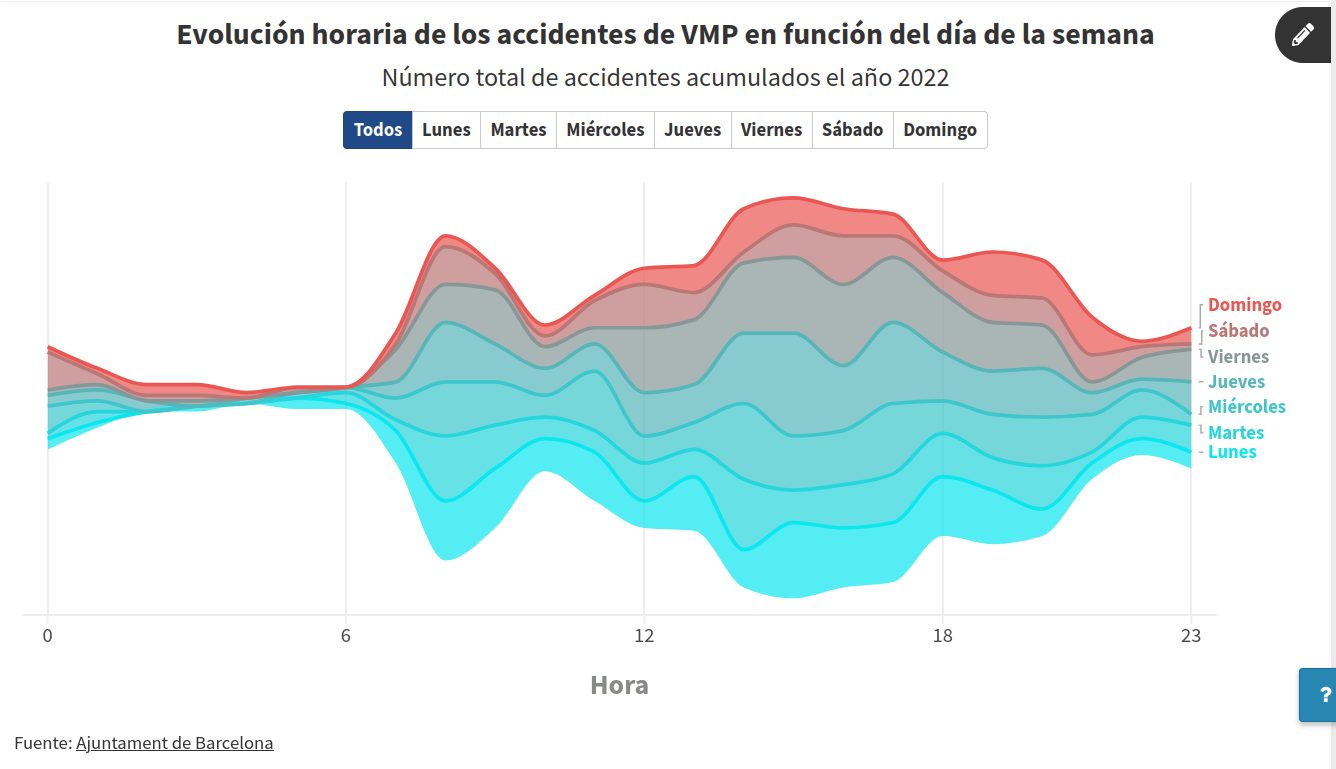

A partir del gráfico se observa:

- La accidentabilidad entre las 0h y las 6h es muy baja, salvo el sábado y el miércoles a las 0h. Habría que comprobar qué días concretos se produjeron dichos accidentes, especialmente los ocurridos en miércoles, para ver si hay una causa común. A priori se podría deducir que la incidencia de los sábados se debe al ocio nocturno, pero convendría un análisis más a fondo de estos accidentes para poder llegar a esta conclusión.
- Se observa un pico de accidentabilidad por las mañanas a las 8h y a las 9h, horas punta en la ciudad por la entrada a puestos de trabajo y lugares de estudio. La incidencia los domingos a esta hora es muy pequeña.
- La máxima incidencia de accidentes de VMPs, marcada por el grosor global de la gráfica, se observa por la tarde entre las 14h y las 18h, especialmente de lunes a viernes, manteniendo niveles igualmente altos hasta las 22h.

### 2.2 Accidentabilidad de VMPs por distrito

El siguiente paso es comprobar en qué distritos de la ciudad la accidentabilidad de VMPs es mayor, tanto en número de accidentes como en porcentaje respecto el total de accidentes en el distrito.

In [17]:
# Subset del dataframe original para obtener los campos de interés
vmp_dte = accs_df.loc[:,["Numero_expedient","Codi_districte","TipusVeh_VMP"]]

print(vmp_dte.head())

  Numero_expedient  Codi_districte  TipusVeh_VMP
0  2022S007749                  -1             0
1  2022S003422                  -1             0
2  2022S003346                  -1             1
3  2022S006073                  -1             0
4  2022S005123                  -1             1


In [18]:
# Asignar el valor 1 a las filas con "TipusVeh_VMP" > 0
vmp_dte.loc[ vmp_dte["TipusVeh_VMP"] > 0, "TipusVeh_VMP"] = 1

In [19]:
vmp_by_dte = vmp_dte.groupby(["Codi_districte"]).\
    agg(VMP=pd.NamedAgg(column="TipusVeh_VMP", aggfunc="sum"),
       Total=pd.NamedAgg(column="Numero_expedient", aggfunc="count")).\
    reset_index()

       
vmp_by_dte["NoVMP"] = vmp_by_dte["Total"] - vmp_by_dte["VMP"]

#print(vmp_by_dte.head())

# Añadir el nombre del distrito a partir de la informacion de bcn_dtos_df
vmp_by_dte = pd.merge(vmp_by_dte, bcn_dtos_df, how="left", on="Codi_districte")

print(vmp_by_dte.head())

   Codi_districte  VMP  Total  NoVMP   Nom_districte
0              -1    8     79     71      Desconegut
1               1   70    481    411    Ciutat Vella
2               2  282   2253   1971        Eixample
3               3  109    852    743  Sants-Montjuïc
4               4   45    531    486       Les Corts


In [20]:
vmp_by_dte.to_csv('results/vmp_by_district.csv', index=False)

#### Gráficas obtenidas y comentario

A continuación se incluyen las capturas de pantalla de las gráficas obtenidas en la herramienta flourish, en las que se muestran el número total de accidentes reportados en cada distrito remarcando aquellos con al menos un VMP implicado y la misma información en porcentaje.

***Total de accidentes por distrito***
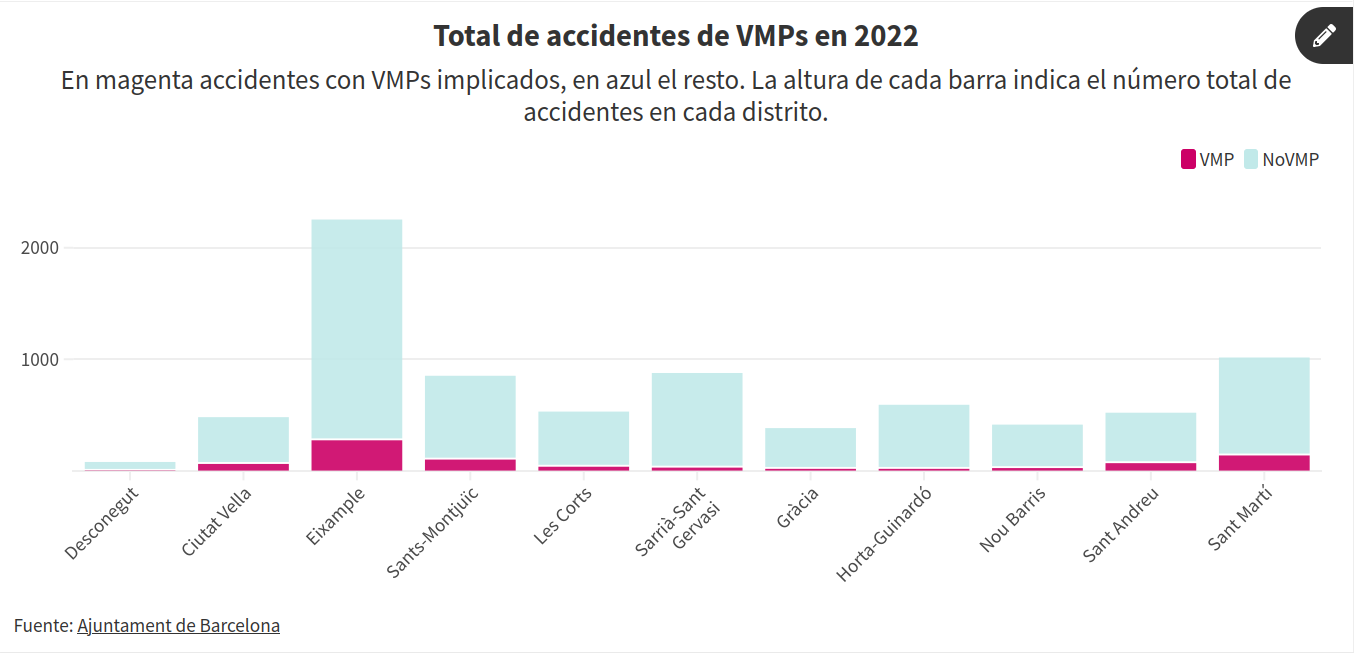


***Porcentaje de accidentes de VMPs por distrito***

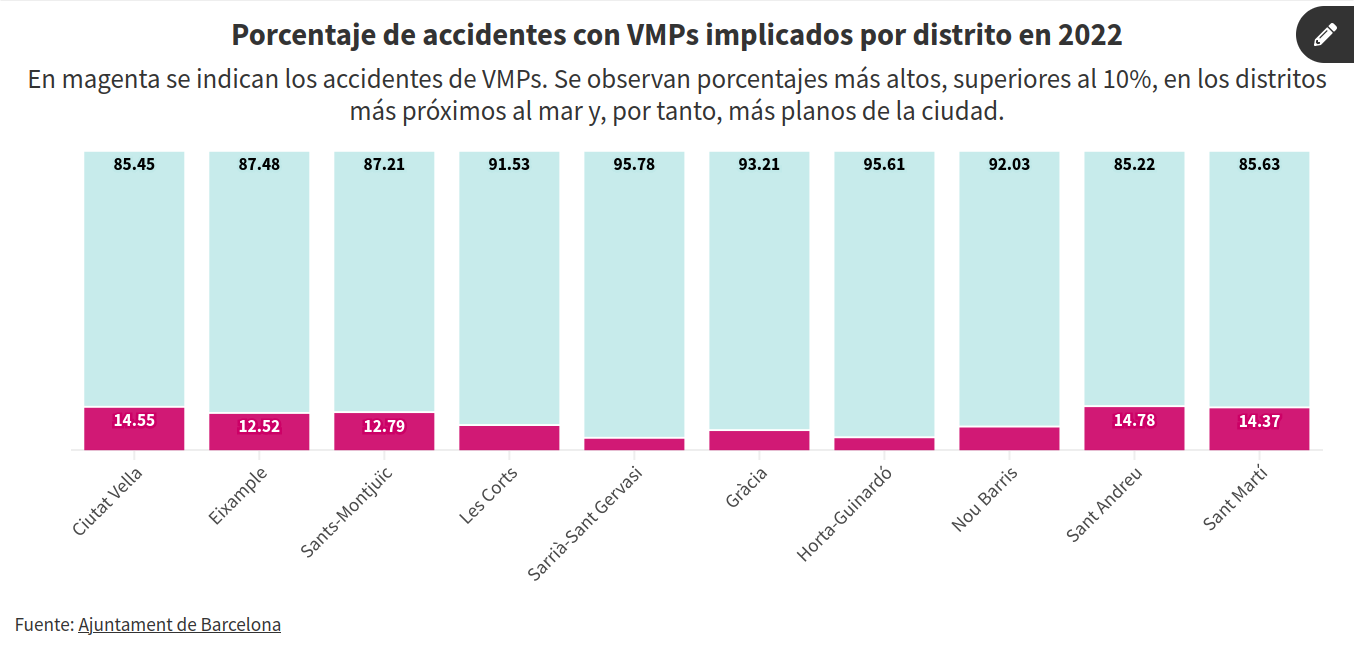


A partir de las gráficas se observa:  

- En números absolutos el distrito de l'Eixample es el que concentra mayor número de accidentes de VMPs (282) prácticamente el doble que el segundo distrito, Sant Martí, con 146.
- En cuanto al porcentaje respecto al total de accidentes se observa que los distritos con mayor incidencia tienen una ratio próxima al 15%, siendo máxima en el distrito de Sant Andreu.
- Se observa que hay cinco distritos con un porcentaje de accidentes de VMPs inferior al 10% del total, que corresponde a los cinco distritos más alejados del mar, con pendientes más pronunciadas.


### 2.3 Accidentabilidad de VMPs por barrio

En este punto se va a extraer la información para visualizar en un mapa coropleta la accidentabilidad de VMPs por barrio.

In [30]:
# Subset del dataframe original para obtener los campos de interés
vmp_barri = accs_vmp_locdf.loc[:,["Numero_expedient","Codi_barri"]]

vmp_by_bri = vmp_barri.groupby(["Codi_barri"]).\
    agg(Total=pd.NamedAgg(column="Numero_expedient", aggfunc="count")).\
    reset_index()

# Añadir el nombre del barrio y del distrito al que pertenece a partir de la informacion de bcn_brs_df
vmp_by_bri = pd.merge(vmp_by_bri, bcn_brs_df, how="right", on="Codi_barri")

vmp_by_bri["Total"] = vmp_by_bri["Total"].fillna(0.0)
vmp_by_bri["Total"] = vmp_by_bri["Total"].astype(int)

print(vmp_by_bri.head())

   Codi_barri  Total  Codi_districte Nom_districte  \
0          -1      8              -1    Desconegut   
1           1     25               1  Ciutat Vella   
2           2     10               1  Ciutat Vella   
3           3     18               1  Ciutat Vella   
4           4     17               1  Ciutat Vella   

                               Nom_barri  
0                             Desconegut  
1                               el Raval  
2                         el Barri Gòtic  
3                         la Barceloneta  
4  Sant Pere, Santa Caterina i la Ribera  


In [31]:
vmp_by_bri.to_csv('results/vmp_by_barri.csv', index=False)

#### Gráfica obtenida y comentario

A continuación se incluye una captura de pantalla del mapa obtenido en la herramienta flourish.

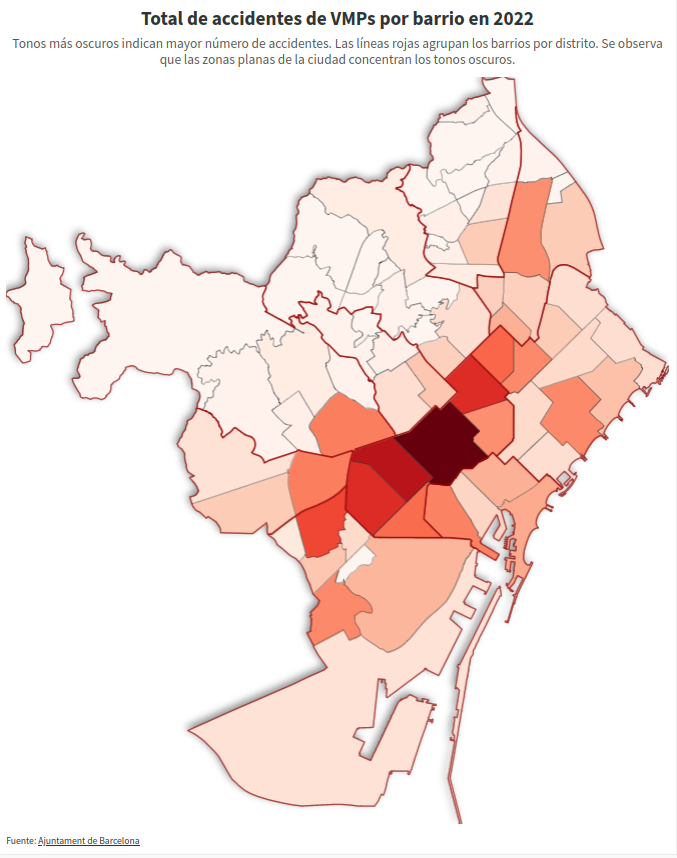

El mapa confirma la observación de las gráficas obtenidas para los distritos, a mayor proximidad al mar y por tanto zonas con pendientes menos pronunciadas de la ciudad, mayor accidentabilidad de VMPs. De todas maneras conviene recordar que correlación no implica causalidad, por lo que habría que verificar otras características de estas zonas que pudieran estar causando la accidentabilidad más elevada: anchura de calles, anchura de aceras, proximidad a puntos de interés, etc...

### 3. Mapa de accidentabilidad de VMPs y afectación de peatones

A partir de los datos de los accidentes con VMPs implicados, se representan en un mapa interactivo en la herramienta flourish, distinguiendo en cuáles ha resultado lesionado algún peatón y la responsabilidad del peatón según el criterio de la GUB. En la leyenda informativa de cada punto se indica la ubicación del peatón en el momento de la colisión con el VMP. El objetivo del mapa interactivo es poder capturar de un vistazo toda la información presentada hasta ahora en el análisis.

En este punto se crea el fichero CSV adecuado para mostrar la información deseada en la herramienta flourish.

In [22]:
fields_keep = ["Numero_expedient", "Latitud", "Longitud",
              "Pers_Vianant", "Es_causa_peaton", "Ubicacion_peaton"]

vmp_peat_accs = accs_vmp_locdf.loc[:, fields_keep]

print(vmp_peat_accs.head(n=10))

   Numero_expedient    Latitud  Longitud  Pers_Vianant Es_causa_peaton  \
2   2022S003346      41.443596  2.176568             0              No   
4   2022S005123      41.385209  2.173975             0              No   
26  2022S001073      41.409435  2.181215             0              No   
34  2022S006468      41.409833  2.185956             0              No   
40  2022S002454      41.413834  2.195381             1              No   
42  2022S002275      41.420500  2.198102             0              No   
43  2022S005199      41.411126  2.185407             1              No   
44  2022S007702      41.406763  2.186853             0              No   
45  2022S002059      41.411891  2.198190             1              Sí   
50  2022S004518      41.412198  2.186875             0              No   

   Ubicacion_peaton  
2       Desconocido  
4       Desconocido  
26      Desconocido  
34      Desconocido  
40    Zona Peatonal  
42      Desconocido  
43    Zona Peatonal  
44      D

In [23]:
# Creacion de un nuevo atributo "categoria" para la representacion adecuada en el mapa de flourish

vmp_peat_accs["Categoria"] = "Otros"
vmp_peat_accs.loc[vmp_peat_accs["Pers_Vianant"] == 0, "Categoria"] = "No_Peaton"
vmp_peat_accs.loc[(vmp_peat_accs["Pers_Vianant"] > 0) & (vmp_peat_accs["Es_causa_peaton"] == "No"), "Categoria"] = "Peaton_NoEsCausa"
vmp_peat_accs.loc[(vmp_peat_accs["Pers_Vianant"] > 0) & (vmp_peat_accs["Es_causa_peaton"] == "Sí"), "Categoria"] = "Peaton_Causa"

print(vmp_peat_accs.head(n=10))


   Numero_expedient    Latitud  Longitud  Pers_Vianant Es_causa_peaton  \
2   2022S003346      41.443596  2.176568             0              No   
4   2022S005123      41.385209  2.173975             0              No   
26  2022S001073      41.409435  2.181215             0              No   
34  2022S006468      41.409833  2.185956             0              No   
40  2022S002454      41.413834  2.195381             1              No   
42  2022S002275      41.420500  2.198102             0              No   
43  2022S005199      41.411126  2.185407             1              No   
44  2022S007702      41.406763  2.186853             0              No   
45  2022S002059      41.411891  2.198190             1              Sí   
50  2022S004518      41.412198  2.186875             0              No   

   Ubicacion_peaton         Categoria  
2       Desconocido         No_Peaton  
4       Desconocido         No_Peaton  
26      Desconocido         No_Peaton  
34      Desconocido      

In [24]:
vmp_peat_accs.to_csv('results/vmp_peat_accs.csv', index=False)